# Day 3 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of F02-1_logs.las well from the data folder
## Perform the below Tasks:

>1. Plot well logs using matplotlib for every well-log in the las file 
2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. Calculate the VP log from the DT sonic curve.
4. Calculate the VP log using AI and RHOB log. 
5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?   

In [1]:
!pip install wellpathpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import welly

### 1. Plot well logs using matplotlib for every well-log in the las file

In [12]:
F02 = lasio.read('C:/Users/amrmoslim928/Documents/GitHub/GeoML-2/10DaysChallenge/Dutch_F3_Logs/F02-1_logs.las')

c:\users\amrmoslim928\appdata\local\programs\python\python36\lib\site-packages\welly\well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
c:\users\amrmoslim928\appdata\local\programs\python\python36\lib\site-packages\welly\curve.py:216: UserWarning: Irregular sampling in depth is not supported. Interpolating to regular basis.
  warnings.warn(m)


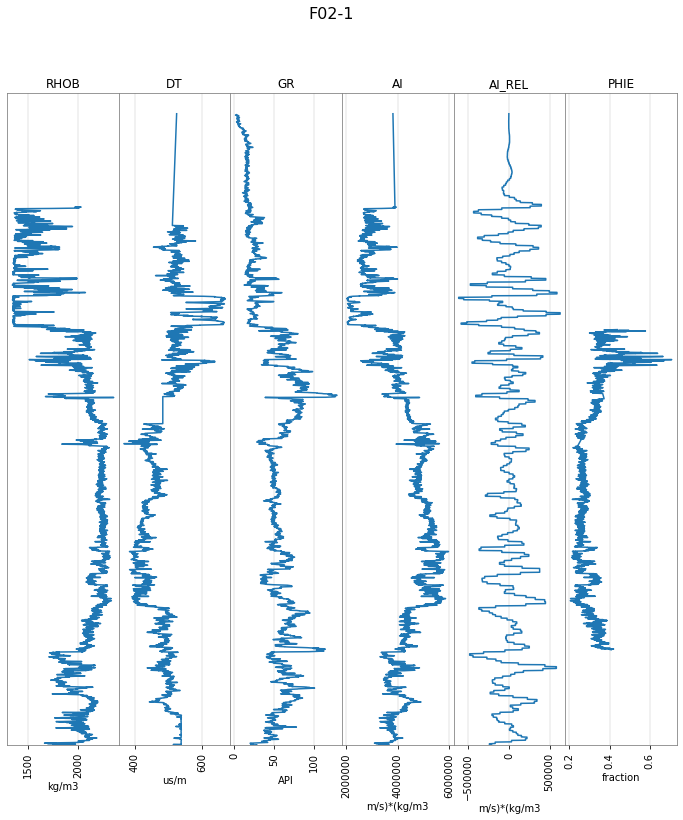

In [4]:
from welly import Well

df2 = Well.from_las('C:/Users/amrmoslim928/Documents/GitHub/GeoML-2/10DaysChallenge/Dutch_F3_Logs/F02-1_logs.las')
df2.plot()

2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.

In [5]:
df = df.df()

In [6]:
df.isna().sum()

RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
dtype: int64

In [13]:
F02.sections

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH STE")],
 'Well': [HeaderItem(mnemonic="STRT", unit="M", value="48.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="M", value="1500.0", descr="END DEPTH"),
  HeaderItem(mnemonic="STEP", unit="M", value="0.15", descr="INCREMENT DEPTH"),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr=""),
  HeaderItem(mnemonic="WELL", unit="", value="F02-1", descr="WELL NAME"),
  HeaderItem(mnemonic="EKB", unit="M", value="30.0", descr="KELLY BUSHING ELEVAT"),
  HeaderItem(mnemonic="EGL", unit="M", value="0.0", descr="GROUND LEVEL ELEVATIO"),
  HeaderItem(mnemonic="EPD", unit="M", value="0.0", descr="PERMANENT DATUM ELEVA"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr=""),
  HeaderItem(mnemonic="LOC", unit="", value="X = 606554.00

In [9]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).round(2)

,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.00,9680.00,9666.00,9680.00,9680.00,4906.00
mean,1975.09,495.03,46.61,4078517.64,5193.73,0.30
std,294.68,50.86,23.48,877687.76,193455.68,0.06
min,1350.44,368.11,1.34,2035266.62,-617319.75,0.20
10%,1411.15,425.14,15.69,2767478.50,-229566.69,0.24
25%,1812.40,460.69,23.53,3658765.50,-95113.83,0.26
50%,2096.34,505.39,48.77,3953107.38,2603.30,0.28
75%,2210.91,521.64,63.16,4782770.38,93553.45,0.34
90%,2246.45,537.54,76.24,5244555.20,244738.27,0.37
max,2346.63,667.92,129.18,5983779.00,629867.00,0.71


3. Calculate the VP log from the DT sonic curve.

In [16]:
df['VP'] = 1000000/df['DT']

4. Calculate the VP log using AI and RHOB log. 

In [25]:
df['VP2'] = df['AI'] / df['RHOB']
df.describe()

,RHOB,DT,GR,AI,AI_REL,PHIE,VP,VP2
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000,9680.000000,8253.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522,2041.364965,2061.059368
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282,209.713789,221.231466
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900,1497.183498,1497.189713
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900,1917.022450,1915.470957
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000,1978.656627,2024.681636
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800,2170.640103,2224.326976
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000,2716.544599,2716.802747


5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes? 

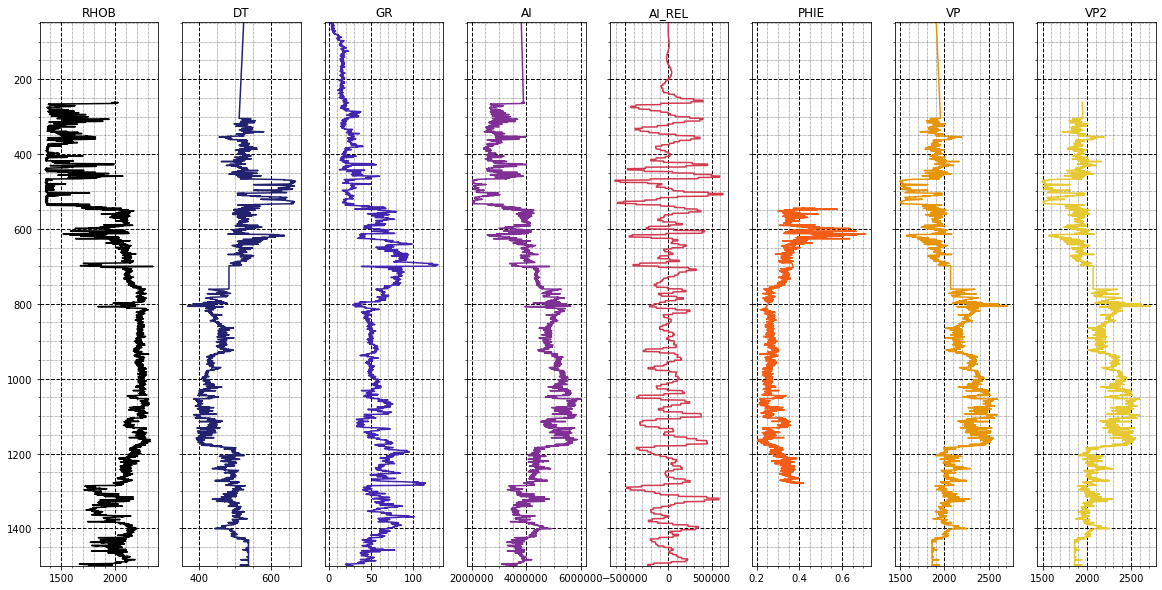

In [30]:
import matplotlib as mpl

rows, cols = 1, df.shape[1]

cmap = mpl.cm.CMRmap

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'VP','VP2']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black', 'green', 'violet']
for i in range(cols):
    ax[i].plot(df.iloc[:,i], df.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df.index), min(df.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %names[i])

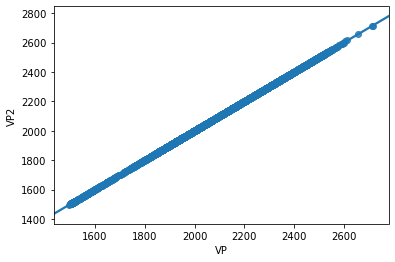

In [33]:
import seaborn as sns
sns.regplot(df.VP, df.VP2)

In [34]:
df[['VP','VP2']].corr()

,VP,VP2
VP,1.0,1.0
VP2,1.0,1.0
